# Objective
The CCSN dataset is a collection of folders of images. This is inconvenient for later image processing and modeling, so this quick notebook will convert these folders of images into a numpy array with another array of labels. This notebook is portable in that as long as original data source url isn't broken, the notebook should run completely.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import joblib
import cv2
import os
import urllib
from zipfile import ZipFile

## Download the data

In [3]:
url = "https://dataverse.harvard.edu/api/access/datafile/3569338"
zip_filename = "CCSN.zip"
output_folder = "."
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9"
}

# Download zip file
request = urllib.request.Request(url, headers = headers)
with urllib.request.urlopen(request) as response, open(zip_filename, "wb") as f:
    data = response.read()
    f.write(data)
    
# Extract zip file
with ZipFile(zip_filename, "r") as f:
    f.extractall(output_folder)

os.remove(zip_filename)

In [4]:
DATA_DIRECTORY = "CCSN_v2"

From some early EDA, we know that most of the images are 400x400 but a few are 256x256. We will upscale the smaller images to match 400x400.

In [5]:
folders = os.listdir(DATA_DIRECTORY)
images = []
labels = []

for folder in folders:
    files = os.listdir(f"{DATA_DIRECTORY}/{folder}")
    for file in files:
        img = cv2.imread(f"{DATA_DIRECTORY}/{folder}/{file}")
        if img.shape == (256, 256, 3):
            img = cv2.resize(img, (400, 400), interpolation = cv2.INTER_CUBIC)
        images.append(img)
        labels.append(folder)

images = np.stack(images, axis=0)
labels = np.array(labels)

To check that reading from joblib will work OK, let's see an example of the data and replicate this with what we get from `joblib.load()`

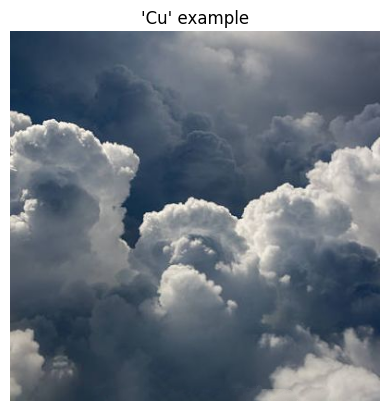

In [6]:
idx = 1000
img = images[idx]
label = labels[idx]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"'{label}' example")
_ = plt.axis("off")

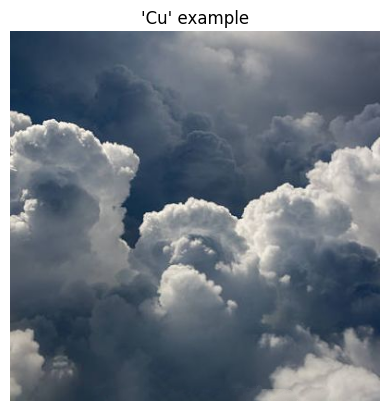

In [7]:
output = (images, labels)
output_filename = "CCSN.joblib"
joblib.dump(output, output_filename)
X, y = joblib.load(output_filename)

idx = 1000
img = X[idx]
label = y[idx]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"'{label}' example")
_ = plt.axis("off")

That's it, we're ready to work with the data in a convenient, portable format.

In [8]:
import shutil
shutil.rmtree("__MACOSX")
shutil.rmtree("CCSN_v2")